## **Code prepared for reading and analysing the GOES netCDF files** \
A Nepomuceno, M Oliveira and C Navia \
Universidade Federal Fluminense

In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import cftime
import matplotlib.pyplot as plt

**Open the NC file**

In [2]:
ds_info = nc.Dataset('ops_seis-l1b-sgps_g16_d20230225_v0-0-0.nc')
ds = nc.Dataset('sci_sgps-l2-avg5m_g16_d20230225_v3-0-0.nc')

In [ ]:
#ds_info

In [3]:
print(ds_info.variables.keys())

dict_keys(['T1_DifferentialProtonFluxes', 'T1_DifferentialProtonFluxUncertainties', 'T1_DifferentialProtonFluxDQFs', 'T2_DifferentialProtonFluxes', 'T2_DifferentialProtonFluxUncertainties', 'T2_DifferentialProtonFluxDQFs', 'T3_DifferentialProtonFluxes', 'T3_DifferentialProtonFluxUncertainties', 'T3_DifferentialProtonFluxDQFs', 'T3P11_IntegralProtonFlux', 'T3P11_IntegralProtonFluxUncertainties', 'T3P11_IntegralProtonFluxDQFs', 'L1a_EngData_Flag', 'L1a_SciData_Flag', 'L1b_Processing_Flag', 'N_blocks', 'Instrument_Mode', 'Instrument_Serial_Number', 'Diff31_Logic_Flags', 'L1a_SciData_TimeStamp', 'quaternion_Q0', 'quaternion_Q1', 'quaternion_Q2', 'quaternion_Q3', 'ECEF_X', 'ECEF_Y', 'ECEF_Z', 'yaw_flip_flag', 'eclipse_flag', 'solar_array_current', 'sgps_telemetry_time', 'sgps_sensor_temperature', 'T1_DifferentialAlphaFluxes', 'T1_DifferentialAlphaFluxUncertainties', 'T1_DifferentialAlphaFluxDQFs', 'T2_DifferentialAlphaFluxes', 'T2_DifferentialAlphaFluxUncertainties', 'T2_DifferentialAlphaFl

In [4]:
ds_info.variables['energy_T1_label']

<class 'netCDF4._netCDF4.Variable'>
|S1 energy_T1_label(energy_T1, energy_T1_str_len)
    long_name: labels for six energy bands reported from telescope 1 spanning from 1 to 25 MeV. labels are ordered the same as applicable data variables
unlimited dimensions: 
current shape = (6, 25)
filling on, default _FillValue of   used

In [5]:
ds_info.variables['energy_T2_label']

<class 'netCDF4._netCDF4.Variable'>
|S1 energy_T2_label(energy_T2, energy_T2_str_len)
    long_name: labels for two energy bands reported from telescope 2 spanning from 25 to 80 MeV. labels are ordered the same as applicable data variables
unlimited dimensions: 
current shape = (2, 22)
filling on, default _FillValue of   used

In [6]:
ds_info.variables['energy_T3_label']

<class 'netCDF4._netCDF4.Variable'>
|S1 energy_T3_label(energy_T3, energy_T3_str_len)
    long_name: labels for five energy bands reported from telescope 3 spanning from 80 to 500 MeV. labels are ordered the same as applicable data variables
unlimited dimensions: 
current shape = (5, 26)
filling on, default _FillValue of   used

Now we check the variable in the file that will be used for plotting

In [7]:
print(ds.variables.keys())

dict_keys(['time', 'L1bRecordsInAvg', 'yaw_flip_flag', 'AvgDiffProtonFlux', 'AvgDiffProtonFluxObserved', 'AvgDiffProtonFluxUncert', 'DiffValidL1bSamplesInAvg', 'DiffDQFdtcSum', 'DiffDQFoobSum', 'DiffDQFerrSum', 'AvgIntProtonFlux', 'AvgIntProtonFluxObserved', 'AvgIntProtonFluxUncert', 'IntValidL1bSamplesInAvg', 'IntDQFdtcSum', 'IntDQFoobSum', 'IntDQFerrSum', 'DiffProtonLowerEnergy', 'DiffProtonUpperEnergy', 'DiffProtonEffectiveEnergy', 'IntegralProtonEffectiveEnergy', 'ExpectedLUTNotFound', 'AvgDiffAlphaFlux', 'AvgDiffAlphaFluxObserved', 'AvgDiffAlphaFluxUncert', 'DiffAlphaLowerEnergy', 'DiffAlphaUpperEnergy', 'DiffAlphaEffectiveEnergy', 'DiffProtonIgnoredL1bDQFs', 'IntProtonIgnoredL1bDQFs', 'DiffAlphaIgnoredL1bDQFs'])


In [8]:
print(ds.variables['time'].units)
print(ds.variables['time'].shape)

seconds since 2000-01-01 12:00:00
(288,)


In [9]:
#Tranform time for a format suitable for plotting
times = cftime.num2pydate(ds.variables['time'][:],ds.variables['time'].units)

In [10]:
#Check units and shape of the Diff Proton flux array
var1 = 'AvgDiffProtonFlux'
print(ds.variables[var1].shape)
print(ds.variables[var1].units)

(288, 2, 13)
protons/(cm^2 sr keV s)


From the df_info, we know that we have 13 energy bands (1 to 500 MeV). There is no information about the steps in each energy span. **Below is my guess**:
0. 1 to 2 MeV
1. 2 to 3 MeV
2. 3 to 4 MeV
3. 4 to 5 MeV
4. 5 to 10 MeV
5. 10 to 25 MeV
6. 25 to 50 MeV
7. 50 to 80 MeV
8. 80 to 100 MeV
9. 100 to 200 MeV
10. 200 to 300 MeV
11. 300 to 400 MeV
12. 400 to 500 MeV

In [11]:
isensor = 0
data_avgd_eng1 = []  
data_avgd_eng2 = []  
data_avgd_eng3 = []  
data_avgd_eng4 = []  
data_avgd_eng5 = []  
data_avgd_eng6 = []  
data_avgd_eng7 = []  
data_avgd_eng8 = []  
for j in range(len(times)):
    data_avgd_eng1.append(ds.variables[var1][j][isensor][5])    
    data_avgd_eng2.append(ds.variables[var1][j][isensor][6])    
    data_avgd_eng3.append(ds.variables[var1][j][isensor][7])    
    data_avgd_eng4.append(ds.variables[var1][j][isensor][8])         
    data_avgd_eng5.append(ds.variables[var1][j][isensor][9])         
    data_avgd_eng6.append(ds.variables[var1][j][isensor][10])         
    data_avgd_eng7.append(ds.variables[var1][j][isensor][11])         
    data_avgd_eng8.append(ds.variables[var1][j][isensor][12])         

As the diffential flux is per keV, and the rang width is 4 MeV, we multiply the sum by 4000

In [12]:
data_avg10_array = 15*np.array(data_avgd_eng1) + 25*np.array(data_avgd_eng2) + 30*np.array(data_avgd_eng3) \
+ 20*np.array(data_avgd_eng4) + 100*np.array(data_avgd_eng5) + 100*np.array(data_avgd_eng6) \
+ 100*np.array(data_avgd_eng7) + 100*np.array(data_avgd_eng8)

In [15]:
data_avg50_array = 30*np.array(data_avgd_eng3) \
+ 20*np.array(data_avgd_eng4) + 100*np.array(data_avgd_eng5) + 100*np.array(data_avgd_eng6) \
+ 100*np.array(data_avgd_eng7) + 100*np.array(data_avgd_eng8)

In [16]:
data_avg100_array = 100*np.array(data_avgd_eng5) + 100*np.array(data_avgd_eng6) \
+ 100*np.array(data_avgd_eng7) + 100*np.array(data_avgd_eng8)

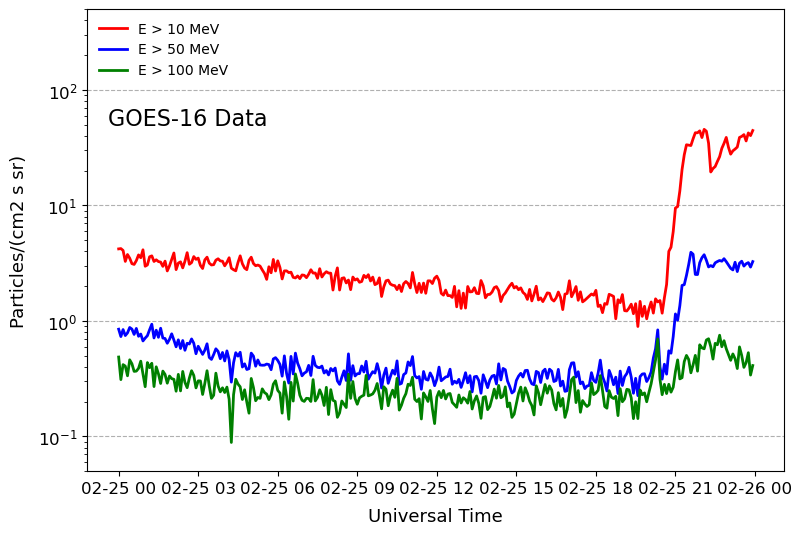

In [54]:
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(times,1000*data_avg10_array,c='r',lw=2,label='E > 10 MeV')
ax.plot(times,1000*data_avg50_array,c='b',lw=2,label='E > 50 MeV')
ax.plot(times,1000*data_avg100_array,c='g',lw=2,label='E > 100 MeV')
ax.set_yscale('log')
ax.set_ylim(0.05,500)
ax.grid(which='major',axis='y',ls='--')
ax.tick_params(labelsize=12, direction='out')
ax.set_xlabel('Universal Time',fontsize=13,labelpad=8)
ax.set_ylabel('Particles/(cm2 s sr)',fontsize=13,labelpad=7)
ax.legend(frameon=False,loc=2)
ax.text(0.03, 0.75, 'GOES-16 Data', color='k', fontdict={'fontsize': 16},transform=ax.transAxes)
plt.savefig('goes16_plot.png')